#### Import libraries

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from pca import PCA

Using TensorFlow backend.
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

#### Load MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Flatten each image in the dataset such that we have a input matrix X of shape (N, q) where q are the number of features in the image and N is the number of samples (images)

In [3]:
N = len(x_train) # Nr data points
q = len(x_train[0].flatten()) # Nr features
X = []
for i in range(N):
    X.append(x_train[i].flatten())
X = np.reshape(X, (N, q))

#### Use only the first n images

In [4]:
n = 400
X_stripped = X[:n]
Y_stripped = y_train[:n]
projection = PCA(X_stripped)

#### We can clearly see here that the first two principal components describe the data quite well in two dimensions.

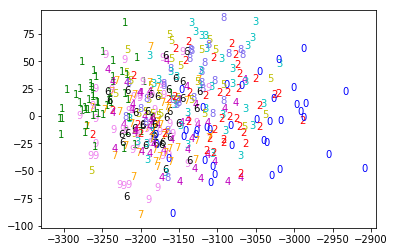

In [5]:
x, y = projection[:, :2].T
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'mediumslateblue', 'violet']
plt.plot(x, y, '.', markersize=0)
for i, tup in enumerate(zip(x, y)):
    xs, ys = tup
    plt.text(xs, ys, str(Y_stripped[i]), color=colors[Y_stripped[i]])
plt.show()

#### Test on oil data
Oil data is taken from: "GPflow: A Gaussian Process Library using TensorFlow" (at their github repo)

[2 1 0 1 0 1 0 0 1 0 1 0 1 0 0 2 2 2 2 0 1 0 0 2 2 0 1 2 1 2 1 2 2 0 0 1 1
 1 1 1 2 1 0 1 0 0 0 2 2 1 1 0 2 0 0 0 2 2 1 0 1 0 0 2 2 0 2 0 1 2 1 1 0 0
 1 1 0 2 2 1 1 0 0 1 1 2 2 1 2 0 2 2 0 2 2 2 0 2 0 2]


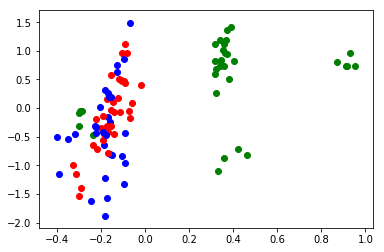

In [29]:
data = np.load("three_phase_oil_flow.npz")
X = data['Y'] # I know this is wierd
#for i in range(len(X)):
#    X[i] = X[i] / np.sum(X[i])
Y = data['labels']
print(Y)
N = len(X)
q = len(X[0])
projection = PCA(X)
x, y = projection[:, :2].T
colors = ['r', 'b', 'g']
for i, tup in enumerate(zip(x, y)):
    xs, ys = tup
    plt.scatter(ys, xs, color=colors[Y[i]])
plt.show()